# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config Completer.use_jedi = False
%matplotlib inline

from IPython.display import display
pd.options.display.max_columns = None

from sklearn.linear_model import LinearRegression

In [2]:
with open('Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
df = pd.read_csv("Aqram_Project1_CleaningOutliers_data.csv")

In [4]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2823,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2824,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827 entries, 0 to 2826
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2827 non-null   int64  
 1   MS SubClass      2827 non-null   int64  
 2   MS Zoning        2827 non-null   object 
 3   Lot Frontage     2353 non-null   float64
 4   Lot Area         2827 non-null   int64  
 5   Street           2827 non-null   object 
 6   Alley            192 non-null    object 
 7   Lot Shape        2827 non-null   object 
 8   Land Contour     2827 non-null   object 
 9   Utilities        2827 non-null   object 
 10  Lot Config       2827 non-null   object 
 11  Land Slope       2827 non-null   object 
 12  Neighborhood     2827 non-null   object 
 13  Condition 1      2827 non-null   object 
 14  Condition 2      2827 non-null   object 
 15  Bldg Type        2827 non-null   object 
 16  House Style      2827 non-null   object 
 17  Overall Qual  

In [6]:
df = df.drop("PID",axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827 entries, 0 to 2826
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2827 non-null   int64  
 1   MS Zoning        2827 non-null   object 
 2   Lot Frontage     2353 non-null   float64
 3   Lot Area         2827 non-null   int64  
 4   Street           2827 non-null   object 
 5   Alley            192 non-null    object 
 6   Lot Shape        2827 non-null   object 
 7   Land Contour     2827 non-null   object 
 8   Utilities        2827 non-null   object 
 9   Lot Config       2827 non-null   object 
 10  Land Slope       2827 non-null   object 
 11  Neighborhood     2827 non-null   object 
 12  Condition 1      2827 non-null   object 
 13  Condition 2      2827 non-null   object 
 14  Bldg Type        2827 non-null   object 
 15  House Style      2827 non-null   object 
 16  Overall Qual     2827 non-null   int64  
 17  Overall Cond  

In [8]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      474
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [9]:
(df.isnull().sum()/len(df))*100

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.766891
Lot Area           0.000000
Street             0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 80, dtype: float64

In [10]:
# Now lets list down the columns with missing data according to the percentage of missing data in ascending order.
percentage_missing_data = (df.isnull().sum()/len(df))*100
percentage_missing_data = percentage_missing_data[percentage_missing_data > 0].sort_values()
percentage_missing_data

Electrical         0.035373
Garage Area        0.035373
Bsmt Half Bath     0.035373
Bsmt Full Bath     0.035373
Total Bsmt SF      0.035373
Bsmt Unf SF        0.035373
BsmtFin SF 1       0.035373
BsmtFin SF 2       0.035373
Garage Cars        0.035373
Mas Vnr Area       0.742837
Mas Vnr Type       0.742837
BsmtFin Type 2     2.759109
Bsmt Cond          2.759109
Bsmt Qual          2.759109
BsmtFin Type 1     2.759109
Bsmt Exposure      2.865228
Garage Type        5.553590
Garage Finish      5.624337
Garage Qual        5.624337
Garage Cond        5.624337
Garage Yr Blt      5.624337
Lot Frontage      16.766891
Fireplace Qu      49.699328
Fence             80.226388
Alley             93.208348
Misc Feature      96.356562
Pool QC           99.717015
dtype: float64

In [11]:
len(percentage_missing_data)

27

Now lets visualize the data in a barplot !

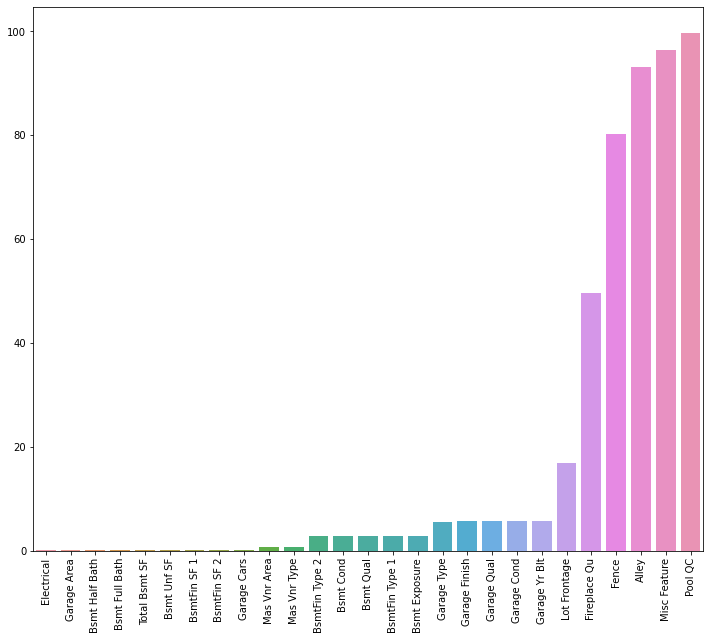

In [12]:
plt.figure(figsize=(12,10))
sns.barplot(x = percentage_missing_data.index, y = percentage_missing_data)
plt.xticks (rotation = 90);

(0.0, 1.0)

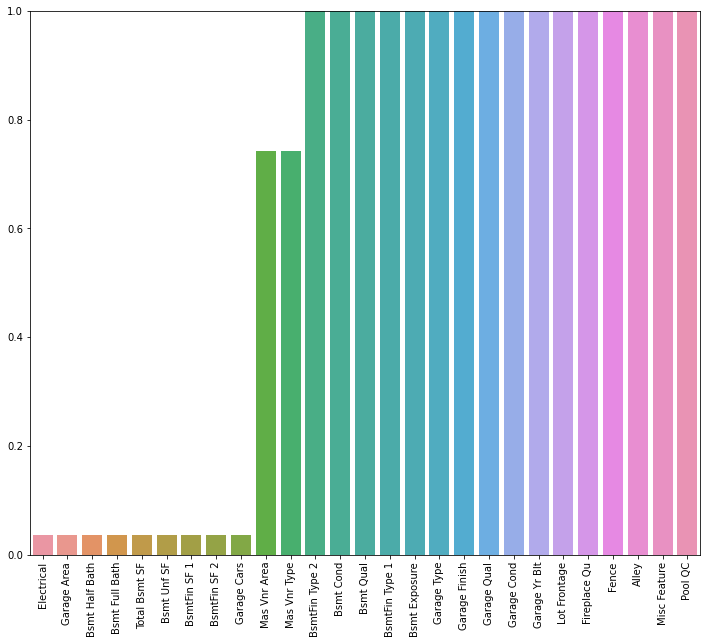

In [13]:
plt.figure(figsize=(12,10))
sns.barplot(x = percentage_missing_data.index, y = percentage_missing_data)
plt.xticks (rotation = 90)
plt.ylim (0,1)

The first 11 features have <1% missing values. After doing the math, 0.035373 = 1 out of 2827 missing value.

### Now lets list out the features with missing values less than 1%

In [14]:
percent_less1 = percentage_missing_data[percentage_missing_data < 1]

In [15]:
percent_less1

Electrical        0.035373
Garage Area       0.035373
Bsmt Half Bath    0.035373
Bsmt Full Bath    0.035373
Total Bsmt SF     0.035373
Bsmt Unf SF       0.035373
BsmtFin SF 1      0.035373
BsmtFin SF 2      0.035373
Garage Cars       0.035373
Mas Vnr Area      0.742837
Mas Vnr Type      0.742837
dtype: float64

In [16]:
len(percent_less1)

11

# Lets clear these features one by one

In [17]:
df[df['Electrical'].isnull()].index

Int64Index([1520], dtype='int64')

In [18]:
df['Electrical'][1520]

nan

In this feature, there's only 1 missing value with no value. 

In [19]:
# Let's drop this missing value

df = df.drop(df[df['Electrical'].isnull()].index)

In [20]:
percentage_missing_data = (df.isnull().sum()/len(df))*100
percentage_missing_data = percentage_missing_data[percentage_missing_data > 0].sort_values()
percentage_missing_data

Total Bsmt SF      0.035386
Garage Area        0.035386
Bsmt Half Bath     0.035386
Bsmt Full Bath     0.035386
Bsmt Unf SF        0.035386
BsmtFin SF 2       0.035386
BsmtFin SF 1       0.035386
Garage Cars        0.035386
Mas Vnr Area       0.743100
Mas Vnr Type       0.743100
Bsmt Cond          2.760085
Bsmt Qual          2.760085
BsmtFin Type 1     2.760085
BsmtFin Type 2     2.760085
Bsmt Exposure      2.866242
Garage Type        5.555556
Garage Finish      5.626327
Garage Qual        5.626327
Garage Cond        5.626327
Garage Yr Blt      5.626327
Lot Frontage      16.772824
Fireplace Qu      49.681529
Fence             80.219391
Alley             93.205945
Misc Feature      96.355272
Pool QC           99.716914
dtype: float64

In [21]:
percent_less1 = percentage_missing_data[percentage_missing_data < 1]
percent_less1

Total Bsmt SF     0.035386
Garage Area       0.035386
Bsmt Half Bath    0.035386
Bsmt Full Bath    0.035386
Bsmt Unf SF       0.035386
BsmtFin SF 2      0.035386
BsmtFin SF 1      0.035386
Garage Cars       0.035386
Mas Vnr Area      0.743100
Mas Vnr Type      0.743100
dtype: float64

In [22]:
len(percent_less1)

10

In [23]:
df[df['Garage Area'].isnull()].index

Int64Index([2154], dtype='int64')

In [24]:
df['Garage Area'][2154]

nan

In [25]:
# Let's drop this missing value

df = df.drop(df[df['Garage Area'].isnull()].index)

In [26]:
percentage_missing_data = (df.isnull().sum()/len(df))*100
percentage_missing_data = percentage_missing_data[percentage_missing_data > 0].sort_values()
percentage_missing_data

Bsmt Unf SF        0.035398
Bsmt Half Bath     0.035398
Bsmt Full Bath     0.035398
Total Bsmt SF      0.035398
BsmtFin SF 2       0.035398
BsmtFin SF 1       0.035398
Mas Vnr Area       0.743363
Mas Vnr Type       0.743363
BsmtFin Type 1     2.761062
BsmtFin Type 2     2.761062
Bsmt Qual          2.761062
Bsmt Cond          2.761062
Bsmt Exposure      2.867257
Garage Type        5.557522
Garage Qual        5.592920
Garage Cond        5.592920
Garage Finish      5.592920
Garage Yr Blt      5.592920
Lot Frontage      16.778761
Fireplace Qu      49.663717
Fence             80.247788
Alley             93.203540
Misc Feature      96.353982
Pool QC           99.716814
dtype: float64

In [27]:
len(percentage_missing_data)

24

In [28]:
percent_less1 = percentage_missing_data[percentage_missing_data < 1]
percent_less1

Bsmt Unf SF       0.035398
Bsmt Half Bath    0.035398
Bsmt Full Bath    0.035398
Total Bsmt SF     0.035398
BsmtFin SF 2      0.035398
BsmtFin SF 1      0.035398
Mas Vnr Area      0.743363
Mas Vnr Type      0.743363
dtype: float64

In [29]:
len(percent_less1)

8

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2825 entries, 0 to 2826
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2825 non-null   int64  
 1   MS Zoning        2825 non-null   object 
 2   Lot Frontage     2351 non-null   float64
 3   Lot Area         2825 non-null   int64  
 4   Street           2825 non-null   object 
 5   Alley            192 non-null    object 
 6   Lot Shape        2825 non-null   object 
 7   Land Contour     2825 non-null   object 
 8   Utilities        2825 non-null   object 
 9   Lot Config       2825 non-null   object 
 10  Land Slope       2825 non-null   object 
 11  Neighborhood     2825 non-null   object 
 12  Condition 1      2825 non-null   object 
 13  Condition 2      2825 non-null   object 
 14  Bldg Type        2825 non-null   object 
 15  House Style      2825 non-null   object 
 16  Overall Qual     2825 non-null   int64  
 17  Overall Cond  

In [31]:
bsmt_num_col = ['Bsmt Half Bath','Bsmt Full Bath','Bsmt Unf SF','Total Bsmt SF','BsmtFin SF 2','BsmtFin SF 1']
df[bsmt_num_col]=df[bsmt_num_col].fillna(0)

In [32]:
percentage_missing_data = (df.isnull().sum()/len(df))*100
percentage_missing_data = percentage_missing_data[percentage_missing_data > 0].sort_values()
percentage_missing_data

Mas Vnr Type       0.743363
Mas Vnr Area       0.743363
BsmtFin Type 2     2.761062
Bsmt Qual          2.761062
Bsmt Cond          2.761062
BsmtFin Type 1     2.761062
Bsmt Exposure      2.867257
Garage Type        5.557522
Garage Cond        5.592920
Garage Qual        5.592920
Garage Finish      5.592920
Garage Yr Blt      5.592920
Lot Frontage      16.778761
Fireplace Qu      49.663717
Fence             80.247788
Alley             93.203540
Misc Feature      96.353982
Pool QC           99.716814
dtype: float64

In [33]:
len(percentage_missing_data)

18

In [34]:
bsmt_str_val = ['BsmtFin Type 1','BsmtFin Type 2','Bsmt Qual','Bsmt Cond','Bsmt Exposure']
df[bsmt_str_val] = df[bsmt_str_val].fillna("None")

In [35]:
percentage_missing_data = (df.isnull().sum()/len(df))*100
percentage_missing_data = percentage_missing_data[percentage_missing_data > 0].sort_values()
percentage_missing_data

Mas Vnr Type      0.743363
Mas Vnr Area      0.743363
Garage Type       5.557522
Garage Yr Blt     5.592920
Garage Finish     5.592920
Garage Qual       5.592920
Garage Cond       5.592920
Lot Frontage     16.778761
Fireplace Qu     49.663717
Fence            80.247788
Alley            93.203540
Misc Feature     96.353982
Pool QC          99.716814
dtype: float64

In [36]:
len(percentage_missing_data)

13

In [37]:
percent_less1 = percentage_missing_data[percentage_missing_data < 1]
percent_less1

Mas Vnr Type    0.743363
Mas Vnr Area    0.743363
dtype: float64

In [38]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna("None")

In [39]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [40]:
percentage_missing_data = (df.isnull().sum()/len(df))*100
percentage_missing_data = percentage_missing_data[percentage_missing_data > 0].sort_values()
percentage_missing_data

Garage Type       5.557522
Garage Yr Blt     5.592920
Garage Finish     5.592920
Garage Qual       5.592920
Garage Cond       5.592920
Lot Frontage     16.778761
Fireplace Qu     49.663717
Fence            80.247788
Alley            93.203540
Misc Feature     96.353982
Pool QC          99.716814
dtype: float64

In [41]:
percent_less1 = percentage_missing_data[percentage_missing_data < 1]
percent_less1

Series([], dtype: float64)

(0.0, 100.0)

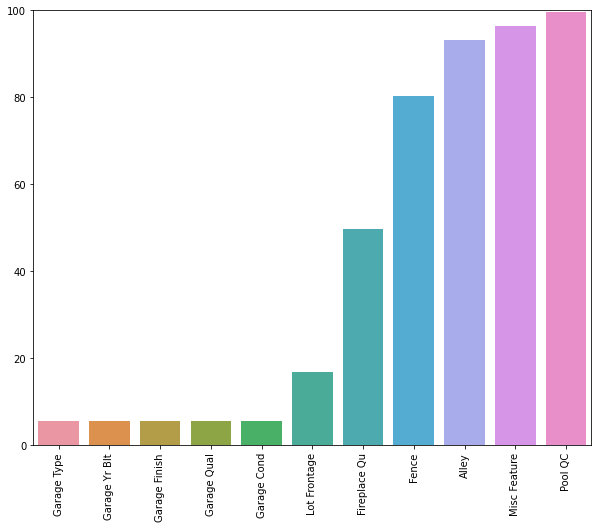

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(x = percentage_missing_data.index, y = percentage_missing_data)
plt.xticks (rotation = 90)
plt.ylim (0,100)

In [43]:
df[['Garage Type','Garage Yr Blt','Garage Finish','Garage Qual','Garage Cond']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond
0,Attchd,1960.0,Fin,TA,TA
1,Attchd,1961.0,Unf,TA,TA
2,Attchd,1958.0,Unf,TA,TA
3,Attchd,1968.0,Fin,TA,TA
4,Attchd,1997.0,Fin,TA,TA
...,...,...,...,...,...
2822,Detchd,1984.0,Unf,TA,TA
2823,Attchd,1983.0,Unf,TA,TA
2824,NaN,NaN,NaN,NaN,NaN
2825,Attchd,1975.0,RFn,TA,TA


In [44]:
garage_num = ['Garage Yr Blt']
df[garage_num]= df[garage_num].fillna(0)

In [45]:
garage_str = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[garage_str] = df[garage_str].fillna('None')

In [46]:
percentage_missing_data = (df.isnull().sum()/len(df))*100
percentage_missing_data = percentage_missing_data[percentage_missing_data > 0].sort_values()
percentage_missing_data

Lot Frontage    16.778761
Fireplace Qu    49.663717
Fence           80.247788
Alley           93.203540
Misc Feature    96.353982
Pool QC         99.716814
dtype: float64

In [47]:
percent_less1 = percentage_missing_data[percentage_missing_data < 1]
percent_less1

Series([], dtype: float64)

(0.0, 100.0)

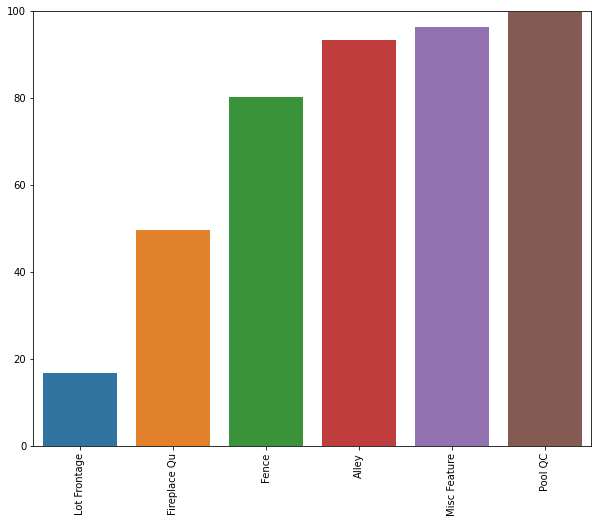

In [48]:
plt.figure(figsize=(10,8))
sns.barplot(x = percentage_missing_data.index, y = percentage_missing_data)
plt.xticks (rotation = 90)
plt.ylim (0,100)

In [49]:
percentage_missing_data.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [50]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2822,37.0,NaN,GdPrv,NaN,NaN,NaN
2823,NaN,NaN,MnPrv,NaN,NaN,NaN
2824,62.0,NaN,MnPrv,NaN,Shed,NaN
2825,77.0,TA,NaN,NaN,NaN,NaN


In [51]:
df = df.drop(['Fence', 'Alley', 'Misc Feature', 'Pool QC'],axis = 1)

In [52]:
percentage_missing_data = (df.isnull().sum()/len(df))*100
percentage_missing_data = percentage_missing_data[percentage_missing_data > 0].sort_values()
percentage_missing_data

Lot Frontage    16.778761
Fireplace Qu    49.663717
dtype: float64

(0.0, 50.0)

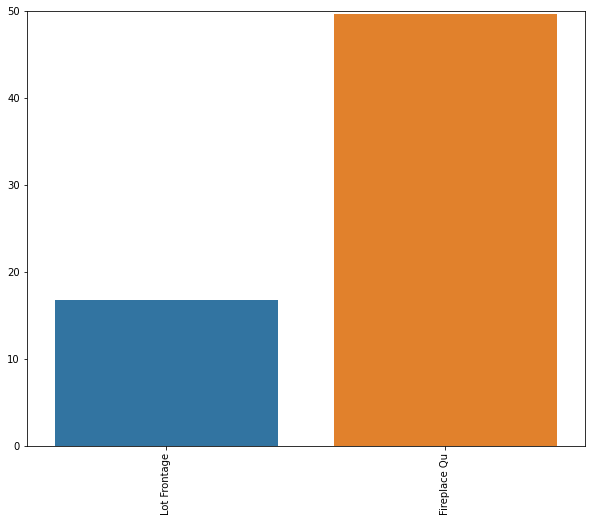

In [53]:
plt.figure(figsize=(10,8))
sns.barplot(x = percentage_missing_data.index, y = percentage_missing_data)
plt.xticks (rotation = 90)
plt.ylim (0,50)

In [54]:
df['Fireplace Qu']= df['Fireplace Qu'].fillna('None')

In [55]:
percentage_missing_data = (df.isnull().sum()/len(df))*100
percentage_missing_data = percentage_missing_data[percentage_missing_data > 0].sort_values()
percentage_missing_data

Lot Frontage    16.778761
dtype: float64

(array([0]), [Text(0, 0, 'Lot Frontage')])

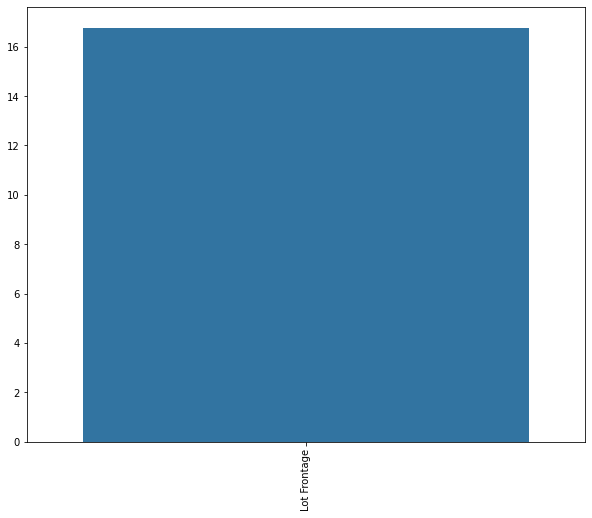

In [56]:
plt.figure(figsize=(10,8))
sns.barplot(x = percentage_missing_data.index, y = percentage_missing_data)
plt.xticks (rotation = 90)

In [57]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

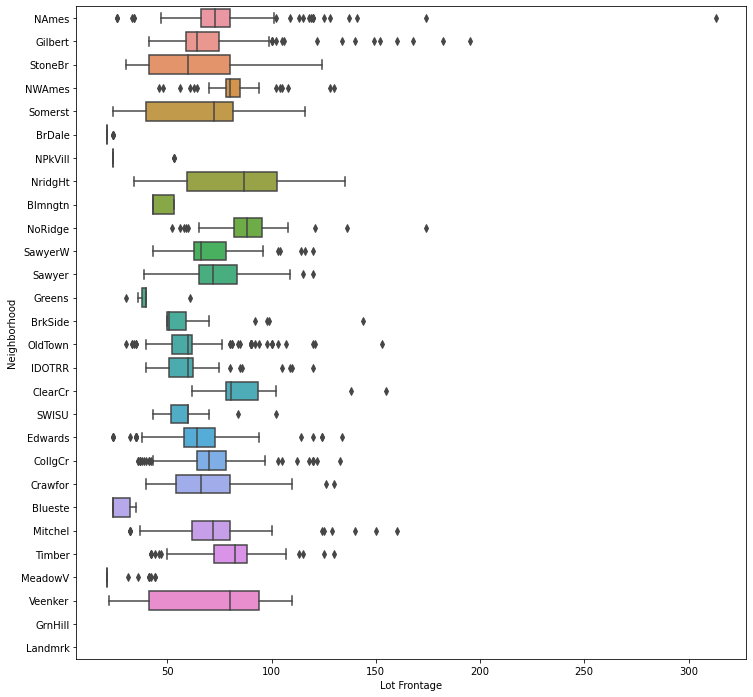

In [58]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Lot Frontage', y = 'Neighborhood', data = df, orient='h')

In [59]:
df.groupby('Neighborhood')['Lot Frontage']

In [60]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.851064
ClearCr    88.150000
CollgCr    71.160550
Crawfor    69.850000
Edwards    64.485549
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     61.674699
Landmrk          NaN
MeadowV    25.606061
Mitchel    73.411765
NAmes      75.000000
NPkVill    28.142857
NWAmes     81.535714
NoRidge    89.170213
NridgHt    81.776978
OldTown    61.531532
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.339806
Somerst    64.519231
StoneBr    61.945946
Timber     78.961538
Veenker    70.714286
Name: Lot Frontage, dtype: float64

In [61]:
df[df['Lot Frontage'].isnull()].index

Int64Index([  11,   14,   21,   22,   23,   52,   54,   55,   71,   76,
            ...
            2743, 2757, 2769, 2790, 2791, 2792, 2795, 2796, 2809, 2823],
           dtype='int64', length=474)

### Transform Column

In [62]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [63]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,None,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1985,1985,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,368.0,BLQ,1120.0,0.0,1488.0,GasA,TA,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,4,Typ,0,None,Attchd,1985.0,RFn,2.0,528.0,TA,TA,Y,0,54,0,0,140,0,0,6,2010,WD,Normal,212000
21,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,533.0,Unf,0.0,281.0,814.0,GasA,Ex,Y,SBrkr,814,860,0,1674,1.0,0.0,2,1,3,1,Gd,7,Typ,0,None,Attchd,2000.0,RFn,2.0,663.0,TA,TA,Y,0,96,0,0,0,0,0,1,2010,WD,Normal,216000
22,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578.0,Unf,0.0,426.0,1004.0,GasA,Ex,Y,SBrkr,1004,0,0,1004,1.0,0.0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,700,3,2010,WD,Normal,149000
23,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1971,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,734.0,Unf,0.0,344.0,1078.0,GasA,Ex,Y,SBrkr,1078,0,0,1078,1.0,0.0,1,1,3,1,TA,6,Typ,1,Fa,Attchd,1971.0,Fin,2.0,500.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,6,1981,1981,Hip,WdShake,Plywood,Plywood,BrkFace,653.0,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1686.0,1686.0,GasA,TA,Y,SBrkr,1707,0,0,1707,0.0,0.0,2,1,2,1,TA,6,Typ,1,TA,Attchd,1981.0,RFn,2.0,511.0,TA,TA,Y,574,64,0,0,0,0,0,1,2006,WD,Normal,228000
2795,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,7,5,1990,1991,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Wood,Gd,TA,No,LwQ,1216.0,Unf,0.0,0.0,1216.0,GasA,Ex,Y,SBrkr,1298,1216,0,2514,0.0,0.0,2,1,4,1,TA,8,Typ,0,None,Attchd,1990.0,Fin,2.0,693.0,TA,TA,Y,0,0,0,0,0,0,0,4,2006,WD,Normal,250000
2796,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,Wood,Gd,TA,Av,GLQ,1136.0,BLQ,116.0,129.0,1381.0,GasA,Ex,Y,SBrkr,1403,0,0,1403,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,2000.0,Unf,2.0,470.0,TA,TA,Y,0,173,0,0,0,0,0,10,2006,WD,Normal,202000
2809,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,1Story,5,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,149.0,Unf,0.0,1503.0,1652.0,

In [64]:
df.iloc[21:26]['Lot Frontage']

21     NaN
22     NaN
23     NaN
24    65.0
25    70.0
Name: Lot Frontage, dtype: float64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

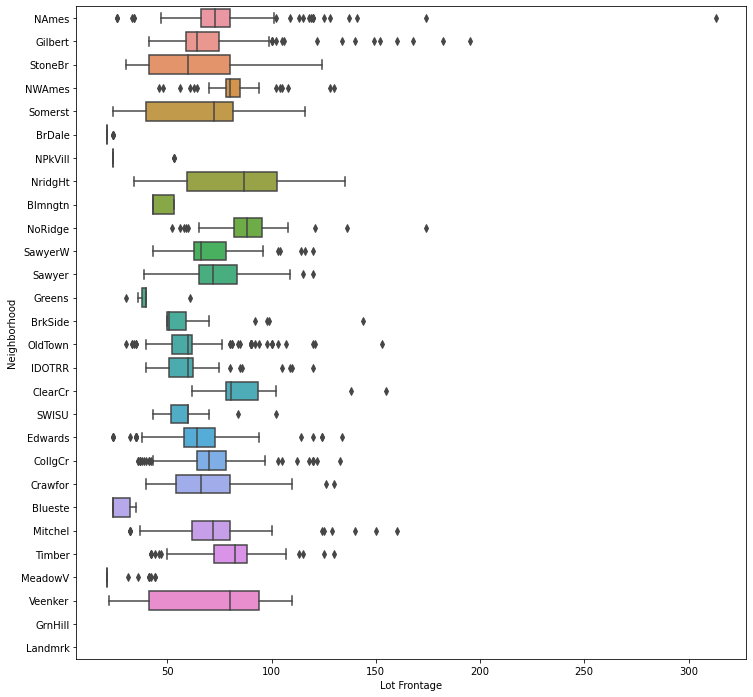

In [65]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Lot Frontage', y = 'Neighborhood', data = df)

In [66]:
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

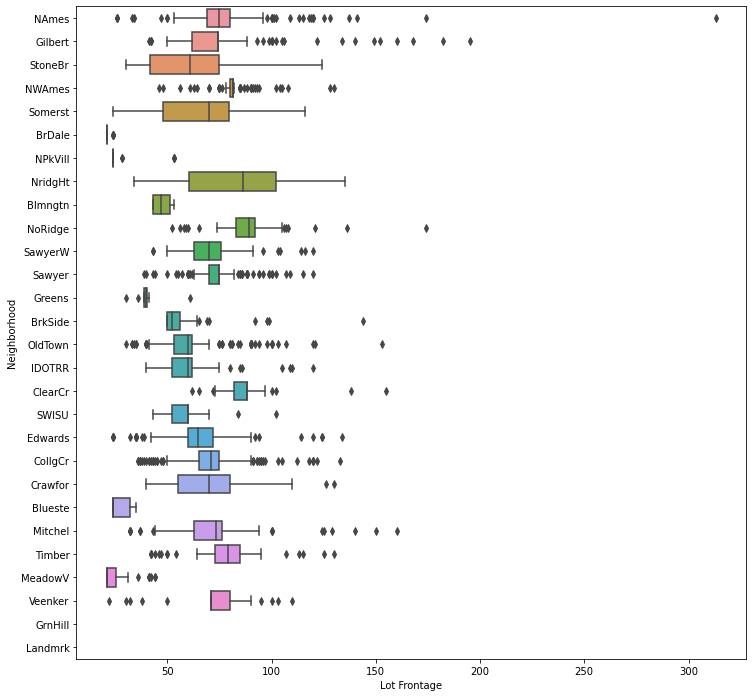

In [67]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Lot Frontage', y = 'Neighborhood', data = df)

In [68]:
df[df['Lot Frontage'].isnull()].index

Int64Index([2174, 2686, 2790], dtype='int64')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2825 entries, 0 to 2826
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2825 non-null   int64  
 1   MS Zoning        2825 non-null   object 
 2   Lot Frontage     2822 non-null   float64
 3   Lot Area         2825 non-null   int64  
 4   Street           2825 non-null   object 
 5   Lot Shape        2825 non-null   object 
 6   Land Contour     2825 non-null   object 
 7   Utilities        2825 non-null   object 
 8   Lot Config       2825 non-null   object 
 9   Land Slope       2825 non-null   object 
 10  Neighborhood     2825 non-null   object 
 11  Condition 1      2825 non-null   object 
 12  Condition 2      2825 non-null   object 
 13  Bldg Type        2825 non-null   object 
 14  House Style      2825 non-null   object 
 15  Overall Qual     2825 non-null   int64  
 16  Overall Cond     2825 non-null   int64  
 17  Year Built    

In [70]:
percentage_missing_data = (df.isnull().sum()/len(df))*100
percentage_missing_data = percentage_missing_data[percentage_missing_data > 0].sort_values()
percentage_missing_data

Lot Frontage    0.106195
dtype: float64

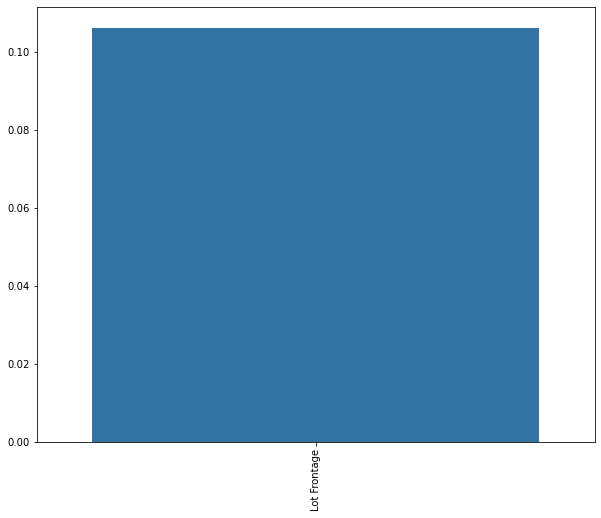

In [71]:
plt.figure(figsize=(10,8))
sns.barplot(x = percentage_missing_data.index, y = percentage_missing_data)
plt.xticks (rotation = 90);

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

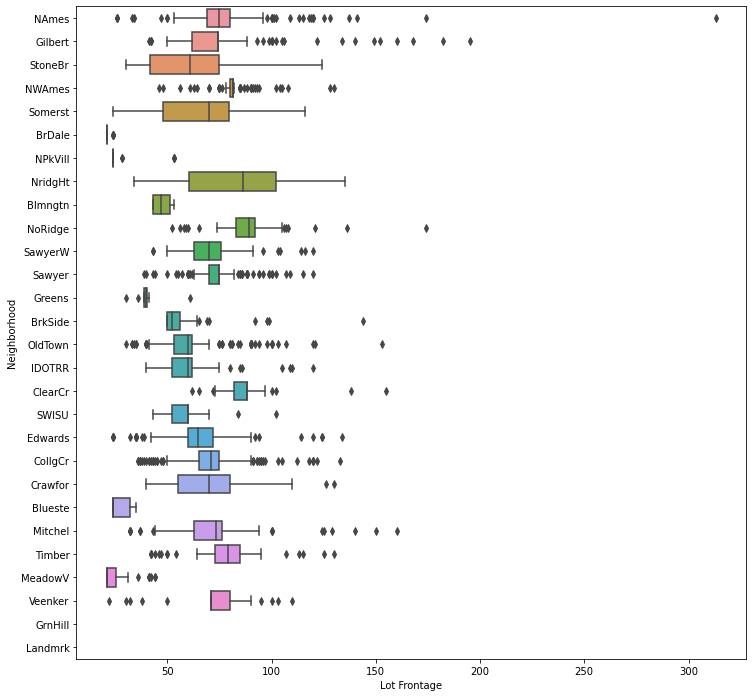

In [72]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Lot Frontage', y = 'Neighborhood', data = df)

In [73]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [1]:
df['Lot Frontage']

NameError: name 'df' is not defined

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

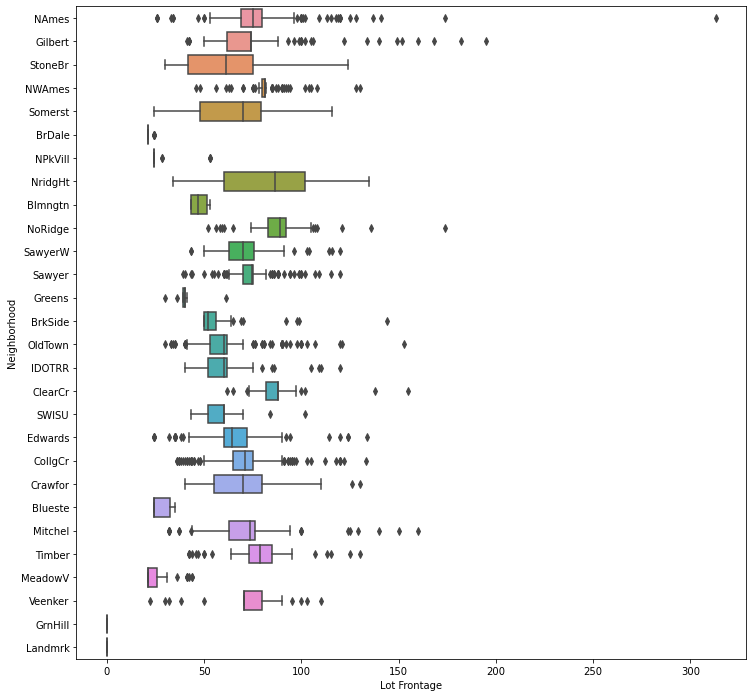

In [74]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Lot Frontage', y = 'Neighborhood', data = df)

In [75]:
percentage_missing_data = (df.isnull().sum()/len(df))*100
percentage_missing_data = percentage_missing_data[percentage_missing_data > 0].sort_values()
percentage_missing_data

Series([], dtype: float64)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2825 entries, 0 to 2826
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2825 non-null   int64  
 1   MS Zoning        2825 non-null   object 
 2   Lot Frontage     2825 non-null   float64
 3   Lot Area         2825 non-null   int64  
 4   Street           2825 non-null   object 
 5   Lot Shape        2825 non-null   object 
 6   Land Contour     2825 non-null   object 
 7   Utilities        2825 non-null   object 
 8   Lot Config       2825 non-null   object 
 9   Land Slope       2825 non-null   object 
 10  Neighborhood     2825 non-null   object 
 11  Condition 1      2825 non-null   object 
 12  Condition 2      2825 non-null   object 
 13  Bldg Type        2825 non-null   object 
 14  House Style      2825 non-null   object 
 15  Overall Qual     2825 non-null   int64  
 16  Overall Cond     2825 non-null   int64  
 17  Year Built    

In [77]:
df.to_csv('Aqram_Project1_CleaningMissingVal_data.csv',index=False)